# Analyse de données FAO v1 (01/2023, Kamel Badar)

# 1 Introduction 

Ce notebook présentera les résultats de l'analyse des données qui a été conduite afin de dresser un panorama mondial de la situation en ce qui concerne la sous-nutrition.

## 1.1 Importation des librairies 

In [30]:
# Importation de 7 librairies pour la manipulation et l'analyse des données
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import folium 
from fuzzywuzzy import fuzz


## 1.2 Importation des données

In [31]:
## Importation des 4 fichiers CSV 
df_aide_alim = pd.read_csv ('aide_alimentaire.csv')
df_dispo_alim = pd.read_csv ('dispo_alimentaire.csv')
df_sous_nutri = pd.read_csv ('sous_nutrition.csv')
df_pop = pd.read_csv ('population.csv')

In [32]:
## Vérification du bon chargement des données pour chaque DF
df_aide_alim.head

<bound method NDFrame.head of      Pays bénéficiaire  Année                   Produit  Valeur
0          Afghanistan   2013       Autres non-céréales     682
1          Afghanistan   2014       Autres non-céréales     335
2          Afghanistan   2013              Blé et Farin   39224
3          Afghanistan   2014              Blé et Farin   15160
4          Afghanistan   2013                  Céréales   40504
...                ...    ...                       ...     ...
1470          Zimbabwe   2015  Mélanges et préparations      96
1471          Zimbabwe   2013              Non-céréales    5022
1472          Zimbabwe   2014              Non-céréales    2310
1473          Zimbabwe   2015              Non-céréales     306
1474          Zimbabwe   2013                Riz, total      64

[1475 rows x 4 columns]>

In [33]:
df_aide_alim.head

<bound method NDFrame.head of      Pays bénéficiaire  Année                   Produit  Valeur
0          Afghanistan   2013       Autres non-céréales     682
1          Afghanistan   2014       Autres non-céréales     335
2          Afghanistan   2013              Blé et Farin   39224
3          Afghanistan   2014              Blé et Farin   15160
4          Afghanistan   2013                  Céréales   40504
...                ...    ...                       ...     ...
1470          Zimbabwe   2015  Mélanges et préparations      96
1471          Zimbabwe   2013              Non-céréales    5022
1472          Zimbabwe   2014              Non-céréales    2310
1473          Zimbabwe   2015              Non-céréales     306
1474          Zimbabwe   2013                Riz, total      64

[1475 rows x 4 columns]>

In [34]:
df_pop.head

<bound method NDFrame.head of              Zone  Année     Valeur
0     Afghanistan   2013  32269.589
1     Afghanistan   2014  33370.794
2     Afghanistan   2015  34413.603
3     Afghanistan   2016  35383.032
4     Afghanistan   2017  36296.113
...           ...    ...        ...
1411     Zimbabwe   2014  13586.707
1412     Zimbabwe   2015  13814.629
1413     Zimbabwe   2016  14030.331
1414     Zimbabwe   2017  14236.595
1415     Zimbabwe   2018  14438.802

[1416 rows x 3 columns]>

In [35]:
df_sous_nutri.head

<bound method NDFrame.head of              Zone      Année Valeur
0     Afghanistan  2012-2014    8.6
1     Afghanistan  2013-2015    8.8
2     Afghanistan  2014-2016    8.9
3     Afghanistan  2015-2017    9.7
4     Afghanistan  2016-2018   10.5
...           ...        ...    ...
1213     Zimbabwe  2013-2015    NaN
1214     Zimbabwe  2014-2016    NaN
1215     Zimbabwe  2015-2017    NaN
1216     Zimbabwe  2016-2018    NaN
1217     Zimbabwe  2017-2019    NaN

[1218 rows x 3 columns]>

Les données ont été correctement chargées dans nos dataframes.

## 1.3 DF sous-nutrition

### 1.3.1 Modification de la colonne 'Année' pour s'adapter aux requêtes

In [36]:
df_sous_nutri["Année"].replace(["2012-2014","2013-2015","2014-2016","2015-2017","2016-2018","2017-2019"],["2013","2014","2015","2016","2017","2018"], inplace=True)
# On transforme les tranches d'années en années en les remplaçant par leur valeur médiane
df_sous_nutri.head    

<bound method NDFrame.head of              Zone Année Valeur
0     Afghanistan  2013    8.6
1     Afghanistan  2014    8.8
2     Afghanistan  2015    8.9
3     Afghanistan  2016    9.7
4     Afghanistan  2017   10.5
...           ...   ...    ...
1213     Zimbabwe  2014    NaN
1214     Zimbabwe  2015    NaN
1215     Zimbabwe  2016    NaN
1216     Zimbabwe  2017    NaN
1217     Zimbabwe  2018    NaN

[1218 rows x 3 columns]>

### 1.3.2 Modification du type des données de la colonne 'Année'

In [37]:
df_sous_nutri.dtypes # On constate que la colonne 'Année' est traitée comme un objet au même titre que la colonne 'Valeur'(voir 1.3.5)

Zone      object
Année     object
Valeur    object
dtype: object

In [38]:
df_sous_nutri['Année'] = df_sous_nutri['Année'].astype(int)
 # On change le type de données en INTEGER
df_sous_nutri.dtypes

Zone      object
Année      int32
Valeur    object
dtype: object

### 1.3.3 Gestion des données manquantes 

In [39]:
# Contrôle des valeurs manquantes sur le DF sous-nutrition

df_sous_nutri.isna().mean()

Zone      0.000000
Année     0.000000
Valeur    0.487685
dtype: float64

In [40]:
df_sous_nutri.dropna(inplace=True) # On a choisi de supprimer les lignes du DF pour lesquelles il y a une valeur manquante

### 1.3.4 Nettoyage complémentaire

In [41]:
df_sous_nutri['Valeur'].replace('<0.1', 0, inplace=True) # On remplace la valeur '<0,1' par 0

### 1.3.5 Modification du type des données de la colonne 'Valeur'

In [42]:
df_sous_nutri['Valeur'] = df_sous_nutri['Valeur'].astype(float)
# On change le type de données en float
df_sous_nutri.dtypes

Zone       object
Année       int32
Valeur    float64
dtype: object

### 1.3.6 Modification de l'unité pour la colonne 'Valeur'

In [43]:
df_sous_nutri['Valeur'] = df_sous_nutri['Valeur']*1000 #Le nombre de personnes en sous-nutrition est exprimé en millions d'habitants dans le fichier initial 
# mais nous avons choisi de le représenter ici en milliers
df_sous_nutri.head

<bound method NDFrame.head of              Zone  Année   Valeur
0     Afghanistan   2013   8600.0
1     Afghanistan   2014   8800.0
2     Afghanistan   2015   8900.0
3     Afghanistan   2016   9700.0
4     Afghanistan   2017  10500.0
...           ...    ...      ...
1195     Viet Nam   2014   8300.0
1196     Viet Nam   2015   7600.0
1197     Viet Nam   2016   7100.0
1198     Viet Nam   2017   6500.0
1199     Viet Nam   2018   6100.0

[624 rows x 3 columns]>

## 1.4 DF disponibilité alimentaire 

### 1.4.1 Gestion des données manquantes 

In [44]:
df_dispo_alim.fillna(0, inplace=True) # On a choisi de remplacer les données manquantes de ce DF par 0 


### 1.4.2 Notes sur la "disponibilité alimentaire"

- La disponibilité alimentaire correspond à la disponibilité d'aliments en quantité suffisante et d'une qualité appropriée pour l’alimentation humaine.

- La disponibilité intérieure correspond à la disponibilité totale d’un aliment au sein du pays.

- Disponibilité intérieure =  production + importations - exportation + variation des stocks

- Disponibilité intérieure = Aliments pour animaux + autres utilisations + nourriture + pertes + semences + traitement


# 2 Les demandes de Marc

### 2.1 La proportion de personnes en état de sous-nutrition pour l'année 2017

In [45]:
# Définir la population mondiale en 2017
pop_mond_2017 = sum(df_pop.loc[df_pop['Année']==2017, 'Valeur'])
# Définir le nombre de personnes en état de sous-nutrition
sous_nut_2017 = sum(df_sous_nutri.loc[df_pop['Année']==2017, 'Valeur'])
# Calculer la proportion de personnes en état de sous-nutrition
prop_ss_nut_2017 = (sous_nut_2017)/(pop_mond_2017)*100
# Arrondir le résultat
prop_ss_nut_2017 = round(prop_ss_nut_2017,2)
# Afficher le résultat 
print(f'En 2017, on comptait {round(pop_mond_2017)*1000} de personnes sur Terre parmi lesquelles {prop_ss_nut_2017}% étaient en état de sous nutrition.')


En 2017, on comptait 7548134000 de personnes sur Terre parmi lesquelles 7.1% étaient en état de sous nutrition.


### 2.2 Le nombre théorique de personnes qui pourraient être nourries

In [46]:
# Joindre les données des DF population et disponibilité alimentaire
pop_2017 = df_pop.loc[df_pop['Année']==2017]
df_dispo_alim = pd.merge(df_dispo_alim, pop_2017, how='left', on='Zone')
# Calculer la disponibilité alimentaire journalière pour la population de chaque pays 
df_dispo_alim['Kcal/jour/population'] = df_dispo_alim['Valeur']*df_dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)']
# On fait la somme de la colonne nouvellement créée et on divise par 2400 (besoin alimentaire moyen par individu) 
# puis on multiplie par 1000 car le résultat est en milliers
# Arrondir et afficher le résultat
resultat_global = round(df_dispo_alim['Kcal/jour/population'].sum()/2400*1000)
print(f' La disponibilité alimentaire mondiale de 2017 pouvait nourrir {resultat_global} personnes, ce qui correspond à {round((resultat_global)/(pop_mond_2017)/1000, 2)} fois la population mondiale')

 La disponibilité alimentaire mondiale de 2017 pouvait nourrir 8716243595 personnes, ce qui correspond à 1.15 fois la population mondiale


### 2.3 Idem pour la disponibilité alimentaire des végétaux

In [47]:
# On garde uniquement la colonne 'Origine' du DF disponibilité alimentaire pour lequel nous avons effectué une jointure précédemment
dispo_orig_vege = df_dispo_alim.loc[df_dispo_alim['Origine']=='vegetale']
# On fait la somme de la colonne nouvellement créée et on divise par 2400 (besoin alimentaire moyen par individu) 
# puis on multiplie par 1000 car le résultat est en milliers.
resultat_vege = round((dispo_orig_vege['Kcal/jour/population'].sum())/2400*1000)
# On affiche le résultat 
print(f'La disponibilité alimentaire végétale mondiale de 2017 pouvait nourrir {resultat_vege} personnes, ce qui correspond à {round((resultat_vege)/(pop_mond_2017)/10)}% de la population mondiale.')

La disponibilité alimentaire végétale mondiale de 2017 pouvait nourrir 7191985088 personnes, ce qui correspond à 95% de la population mondiale.


### 2.4 L'utilisation de la disponibilité intérieure 

In [48]:
# Extraction des colonnes correspondantes aux différentes utilisations possibles de la disponibilité alimentaire
colonnes_a_extraire = ['Aliments pour animaux', 'Semences', 'Autres Utilisations', 'Pertes', 'Traitement', 'Nourriture']

# Obtention du total correspondant aux colonnes selectionnées qu'on divise par 1000 pour avoir le resultat en tonnes
total_tonnes= df_dispo_alim[colonnes_a_extraire].sum()/1000

# On établit un nom afin d'indexer les types d'utilisation aux lignes du DF
total_tonnes.index.name = 'Utilisations'

# On crée le DF avec les nouvelles valeurs 
df_repartition_dispo_interieure_2017 = pd.DataFrame(total_tonnes, columns=['total_tonnes'])

# Calcul de la disponibilité totale 
disponibilite_totale = total_tonnes.sum()
# Création d'une colonne montrant la proportion de chaque type d'utilisation par rapport à la disponibilité alimentaire totale 
# qu'on arrondit à deux décimales. On affiche ensuite le résultat dans l'ordre croissant des proportions.
df_repartition_dispo_interieure_2017['proportion'] = round(total_tonnes.div(disponibilite_totale)*100,2)
df_repartition_dispo_interieure_2017.sort_values(by='proportion', ascending=True)

,total_tonnes,proportion
Utilisations,,
Semences,154.681,1.57
Pertes,453.698,4.60
Autres Utilisations,865.023,8.77
Aliments pour animaux,1304.245,13.23
Traitement,2204.687,22.36
Nourriture,4876.258,49.46


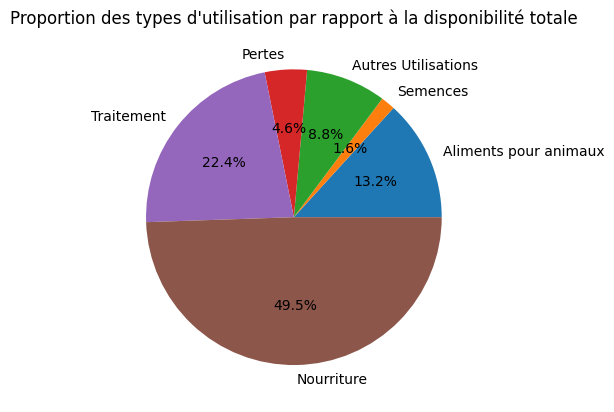

In [49]:
# On crée un diagramme en 'camembert' pour visualiser les données 

x = df_repartition_dispo_interieure_2017.index
y = df_repartition_dispo_interieure_2017['proportion']
plt.pie(y,labels=x, autopct='%1.1f%%')

# Ajout d'un titre
plt.title('Proportion des types d\'utilisation par rapport à la disponibilité totale')

# Montrer le graphique
plt.show()

# 3 Les demandes de Julien 

### 3.1 Les chiffres intéressants sur l’utilisation des céréales, notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux?

In [50]:
# On consulte les données disponibles sur le site de la FAO pour connaître les différentes catégories de céréales
# puis on crée une liste à partir de celles-ci
Liste_cereales_site = ['Blé et produits', 'Riz (Eq Blanchi)', 'Orge et produits', 'Maïs et produits', 'Seigle et produits',
            'Avoine', 'Millet et produits', 'Sorgho et produits', 'Céréales Autres']

In [51]:
# On affiche les valeurs uniques de la colonne "produit" du DF dispo alimentaire afin de disposer de toutes les catégories
Liste_dispos = df_dispo_alim["Produit"].unique()

In [52]:
# On crée une fonction qui vise à comparer les deux liste et qui retournera les valeurs à conserver (i.e toutes les céréales)
def CompareLists(list1, list2):
    dict = {}
    liste_cereales = []
    for item1 in list1:
        for item2 in list2:
            current_leven = fuzz.partial_ratio(item1, item2)
            if current_leven > 93:
                dict[item1] = (item2, current_leven)
                liste_cereales.append(item2)
    return liste_cereales


CompareLists(Liste_cereales_site, Liste_dispos)

['Blé',
 'Riz (Eq Blanchi)',
 'Orge',
 'Maïs',
 'Seigle',
 'Avoine',
 'Millet',
 'Sorgho']

In [53]:
# On crée un dataframe uniquement composé des produits céréaliers en les localisant dans le DF dispo alim
df_dispo_alim_cereales = df_dispo_alim.loc[df_dispo_alim["Produit"].isin(
    Liste_cereales_site)]
df_dispo_alim_cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,Kcal/jour/population
47,Afghanistan,Riz (Eq Blanchi),vegetale,0.0,0.0,141.0,13.82,0.27,2.70,461.0,...,119.0,422.0,24.0,342.0,14.0,0.0,0.0,2017.0,36296.113,5117751.933
67,Afrique du Sud,Avoine,vegetale,8.0,0.0,5.0,0.75,0.09,0.16,49.0,...,25.0,40.0,1.0,28.0,1.0,0.0,0.0,2017.0,57009.756,285048.780
138,Afrique du Sud,Riz (Eq Blanchi),vegetale,0.0,0.0,169.0,17.41,0.23,3.25,920.0,...,1311.0,919.0,0.0,3.0,0.0,0.0,-231.0,2017.0,57009.756,9634648.764
162,Albanie,Avoine,vegetale,25.0,0.0,1.0,0.13,0.01,0.03,28.0,...,1.0,0.0,1.0,27.0,1.0,0.0,0.0,2017.0,2884.169,2884.169
231,Albanie,Riz (Eq Blanchi),vegetale,0.0,0.0,68.0,7.78,0.16,1.34,25.0,...,25.0,25.0,0.0,0.0,0.0,0.0,0.0,2017.0,2884.169,196123.492


In [54]:
# On calcule la part attribuée aux humains et aux animaux pour la dispo alim en céréales ainsi que les pertes et le reste des utilisations

animaux_cereales = round(df_dispo_alim_cereales['Aliments pour animaux'].sum()*100/df_dispo_alim_cereales['Disponibilité intérieure'].sum(),1)
print ("Pourcentage de disponibilité céréalière alloué à l'alimentation animale= ", animaux_cereales)
humains_cereales = round(df_dispo_alim_cereales['Nourriture'].sum()*100/df_dispo_alim_cereales['Disponibilité intérieure'].sum(),1)
print ("Pourcentage de disponibilité céréalière alloué à l'alimentation humaine = ", humains_cereales)
pertes_cereales = round(df_dispo_alim_cereales['Pertes'].sum()*100/df_dispo_alim_cereales['Disponibilité intérieure'].sum(),1)
print ("Pourcentage de disponibilité céréalière finissant en pertes =", pertes_cereales)
print ("Pourcentage de disponibilité céréalière des autres utilisations = ", round(100-(humains_cereales + animaux_cereales + pertes_cereales),1))

Pourcentage de disponibilité céréalière alloué à l'alimentation animale=  10.0
Pourcentage de disponibilité céréalière alloué à l'alimentation humaine =  76.4
Pourcentage de disponibilité céréalière finissant en pertes = 5.6
Pourcentage de disponibilité céréalière des autres utilisations =  8.0


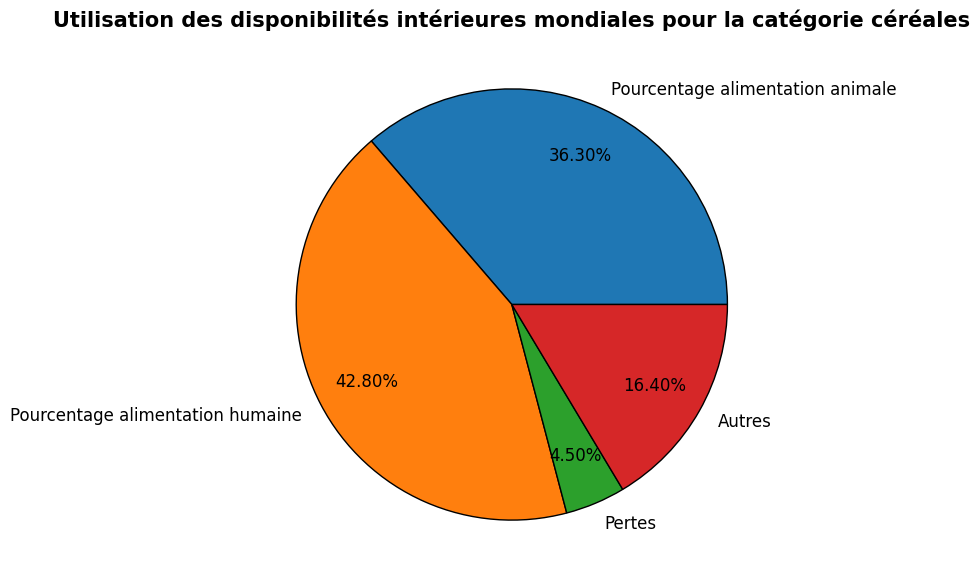

In [55]:
# On crée un graphique pour visualiser les résultats en incluant également les autres utilisations 
cer_prop = [36.3, 42.8, 4.5, 16.4]
cer_label = ['Pourcentage alimentation animale', 'Pourcentage alimentation humaine', 'Pertes', 'Autres']
plt.figure(figsize = (7,7))
plt.pie(cer_prop, labels = cer_label, autopct = '%.2f%%', pctdistance = 0.76, 
        wedgeprops={'linewidth': 1.0,'edgecolor':'black'}, textprops={'fontsize': 12})
plt.title("Utilisation des disponibilités intérieures mondiales pour la catégorie céréales", fontweight = 'bold', fontsize = 15)
plt.show()

### 3.2 L'utilisation de la disponibilité intérieure du manioc en Thaïlande

In [56]:
# On calcule la population de la Thaïlande 
def thai_pop_2017(df_pop):
    population_2017 = round((df_pop.loc[(df_pop['Zone'] == 'Thaïlande') & (df_pop['Année'] == 2017)]['Valeur']),0)
    if len(population_2017)==0:
        return None
    else:
        return population_2017.values[0]

In [57]:
# On crée un DF avec les données de sous nutrition de la Thaïlande couplées aux données de population
thai_sous_nutri = df_sous_nutri.loc[(df_sous_nutri['Zone'] == 'Thaïlande') & (df_sous_nutri['Année'] == 2017)]
population = thai_pop_2017(df_pop)
thai_sous_nutri_pop= thai_sous_nutri.assign( thai_pop_2017 = population)
thai_sous_nutri_pop['proportion_thai'] = round((thai_sous_nutri_pop['Valeur']/ thai_sous_nutri_pop['thai_pop_2017']*100),2)
thai_sous_nutri_pop.rename(columns={'Valeur':"pop_sous_nutri"})

,Zone,Année,pop_sous_nutri,thai_pop_2017,proportion_thai
1114,Thaïlande,2017,6200.0,69210.0,8.96


##### En 2017, en Thaïlande, 8,96% de la population était en état de sous-nutrition

In [58]:
# Création d'un DataFrame filtrant les résultats sur la Thaïlande et le manioc
df_thai_manioc_dispo_alim = df_dispo_alim.loc[
    (df_dispo_alim["Zone"] == "Thaïlande")
    & (df_dispo_alim["Produit"] == "Manioc")]

# Création d'un df filtrant la population en sous-nutrition pour 2017
sous_nut_2017 = thai_sous_nutri_pop.loc[
    thai_sous_nutri_pop["Année"] == 2017]

# Jointure les deux DF

df_manioc_thai_2017 = pd.merge(df_thai_manioc_dispo_alim, sous_nut_2017, on='Zone')
df_manioc_thai_2017


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Semences,Traitement,Variation de stock,Année_x,Valeur_x,Kcal/jour/population,Année_y,Valeur_y,thai_pop_2017,proportion_thai
0,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,...,0.0,0.0,0.0,2017.0,69209.81,2768392.4,2017,6200.0,69210.0,8.96


In [59]:
# On crée un graphique afin de visualiser la répartition de l'utilisation du manioc

# On créé un dataframe pour manipuler nos données dans des graphiques
utilisation_manioc_thailande = df_manioc_thai_2017[
    ["Disponibilité intérieure", "Exportations - Quantité", "Production", "Importations - Quantité", "Variation de stock"]]

# On modifie le nom en guise de changement de label en amont
utilisation_manioc_thailande = utilisation_manioc_thailande.rename(columns={"Exportations - Quantité": "Exportations",
"Importations - Quantité": "Importations"})

# On transforme nos colonnes en lignes pour les utiliser en catégories
bar_manioc_thailande = pd.melt(utilisation_manioc_thailande, var_name="Utilisation",
                               value_name="Valeur (en milliers de tonnes)", value_vars=None, ignore_index=False)

# On utilise .to_numeric pour améliorer la lecture de la valeur
bar_manioc_thailande["Valeur (en milliers de tonnes)"] = pd.to_numeric(
    bar_manioc_thailande["Valeur (en milliers de tonnes)"])

# on reset l'index
bar_manioc_thailande.reset_index(drop=True, inplace=True)

fig = px.bar(bar_manioc_thailande,
             x="Utilisation",
             y="Valeur (en milliers de tonnes)",
             color="Utilisation",
             title="<b>Provenance et utilisation du manioc en Thaïlande</b>"
             )

fig.show()

In [60]:
utilisation_manioc_thailande.assign(prop_exp= round(utilisation_manioc_thailande['Exportations']/utilisation_manioc_thailande['Production']*100, 2), 
prop_imp= round(utilisation_manioc_thailande['Importations']/utilisation_manioc_thailande['Production']*100, 2))





,Disponibilité intérieure,Exportations,Production,Importations,Variation de stock,prop_exp,prop_imp
0,6264.0,25214.0,30228.0,1250.0,0.0,83.41,4.14


#### On constate que 83,41% de la production de manioc de la Thaïlande est exportée alors que dans le même temps 8.96% de la population est en état de sous-nutrtition. La Thaïlande a également recours à l'importation pour le manioc à hauteur de 4,14% malgré des chiffres élevés en ce qui concerne la production. 

# 4 Les demandes de Mélanie

### 4.1 Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [61]:
# A l'aide d'une jointure, on crée un DF contenant la population en sous-nutrition et la population totale
df_sous_nutri_pop_v1 = pd.merge(
df_sous_nutri, df_pop, how="left", on=["Zone", "Année"])
df_prop_sous_nutri = df_sous_nutri_pop_v1.rename(
columns={"Valeur_x": "Population en sous-nutrition", "Valeur_y": "Population totale"})

In [62]:
# On crée une colonne correspondant à la proportion de personnes en sous-nutrition par pays
df_prop_sous_nutri= df_prop_sous_nutri.assign(
Proportion_Pop_Sous_Nutrition=(df_prop_sous_nutri["Population en sous-nutrition"]/
df_prop_sous_nutri["Population totale"]*100))
df_prop_sous_nutri.loc[df_prop_sous_nutri["Année"] == 2017].sort_values(by="Proportion_Pop_Sous_Nutrition", ascending=False).head(10)


,Zone,Année,Population en sous-nutrition,Population totale,Proportion_Pop_Sous_Nutrition
249,Haïti,2017,5300.0,10982.366,48.259182
496,République populaire démocratique de Corée,2017,12000.0,25429.825,47.188685
346,Madagascar,2017,10500.0,25570.512,41.062924
334,Libéria,2017,1800.0,4702.226,38.279742
322,Lesotho,2017,800.0,2091.534,38.249438
569,Tchad,2017,5700.0,15016.753,37.957606
508,Rwanda,2017,4200.0,11980.961,35.055619
400,Mozambique,2017,9400.0,28649.018,32.810898
581,Timor-Leste,2017,400.0,1243.258,32.173531
4,Afghanistan,2017,10500.0,36296.113,28.928718


### 4.2 Les pays ayant le plus bénéficié d'aides depuis 2013

In [63]:
# On crée un tableau croisé dynamique qui contient le montant d'aide alimentaire reçu par pays depuis 2013
# via une fonction d'aggrégation reposant sur Numpy et on affiche ensuite un top 10 des pays qui ont le plus bénéficié grâce à un tri
pt_aide_alimentaire = df_aide_alim.pivot_table(
    values=["Valeur"],
    index="Pays bénéficiaire",
    aggfunc={"Valeur": np.sum}
)

print("Les 10 Pays qui ont le plus bénéficié d'aide alimentaire (tonnes) depuis 2013 sont: ")
pt_aide_alimentaire.sort_values(by="Valeur", ascending=False).head(10)

Les 10 Pays qui ont le plus bénéficié d'aide alimentaire (tonnes) depuis 2013 sont: 


,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


### 4.3 Quels sont ceux ayant le plus et le moins de disponibilité par habitant?

#### 4.3.1 Top 10 pays ayant le plus de disponibilité 

In [64]:
# On crée un tableau croisé dynamique qui contient la disponibilité alimentaire par pays et on effectue un classement dans l'ordre décroissant
# On affiche ensuite un top 10
pt_dispo_alim = df_dispo_alim.pivot_table(
    values=["Disponibilité alimentaire (Kcal/personne/jour)"],
    index="Zone",
    aggfunc={"Disponibilité alimentaire (Kcal/personne/jour)": np.sum})
print("Top 10 pays ayant le plus de disponibilité alimentaire par habitant en 2017:")
pt_dispo_alim.sort_values(
    by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=False).head(10)

Top 10 pays ayant le plus de disponibilité alimentaire par habitant en 2017:


,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


#### 4.3.2 Top 10 pays ayant le moins de disponibilité 

In [65]:
# On utilise le même tableau croisé dynamique mais en classant cette fois-ci dans l'ordre croissant 
print("Classement des 10 pays ayant le moins de disponibilité alimentaire par habitant en 2017:")
pt_dispo_alim.sort_values(
    by="Disponibilité alimentaire (Kcal/personne/jour)").head(10)

Classement des 10 pays ayant le moins de disponibilité alimentaire par habitant en 2017:


,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0
